In [45]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignore warnings
df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/classification/diabetes/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [47]:
X = df.iloc[:,1:9]
y = df[['Outcome']]

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#fix the random seed (to reproduce the results)


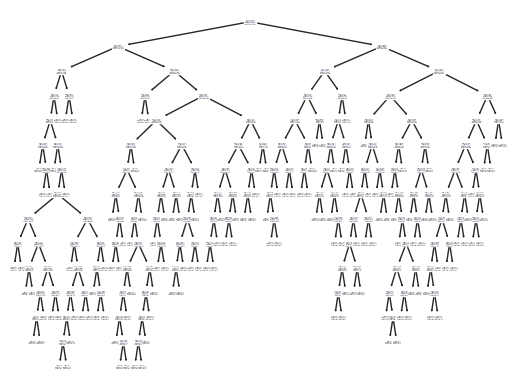

In [49]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

dt_classifier = DecisionTreeClassifier(criterion="gini",max_depth=None,min_samples_leaf=1)#Setting the decision tree - settings
dt_classifier.fit(X_train,y_train)#train the classifier

tree.plot_tree(dt_classifier)
plt.show()

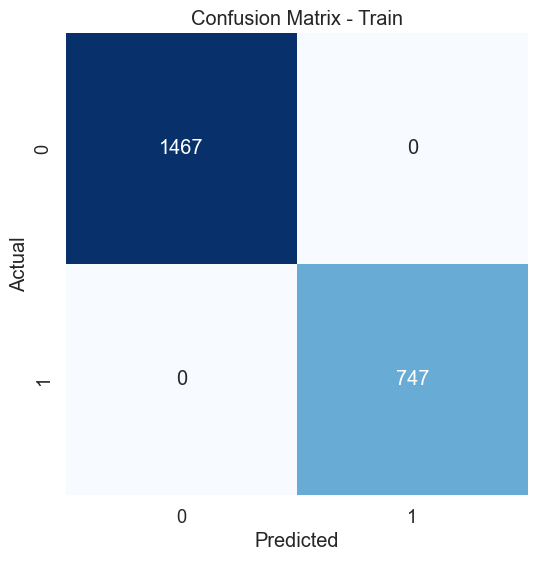

Classification Report:
               precision    recall  f1-score   support

has diabetes       1.00      1.00      1.00      1467
 no diabetes       1.00      1.00      1.00       747

    accuracy                           1.00      2214
   macro avg       1.00      1.00      1.00      2214
weighted avg       1.00      1.00      1.00      2214



In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np

#get model prediction on train set and test set
y_pred_train = dt_classifier.predict(X_train)
y_pred_test = dt_classifier.predict(X_test)

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)

# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train')
plt.show()

train_report = classification_report(y_train, y_pred_train, target_names=['has diabetes','no diabetes'])
print("Classification Report:\n", train_report)

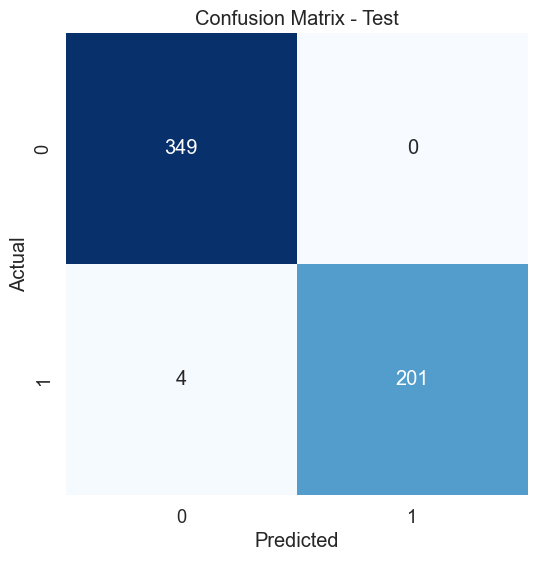

Classification Report:
               precision    recall  f1-score   support

has diabetes       0.99      1.00      0.99       349
 no diabetes       1.00      0.98      0.99       205

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



In [51]:
# Create confusion matrix test set
cm_test = confusion_matrix(y_test, y_pred_test)
# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()

#tn, fp, fn, tp = cm_test
class_acc = (cm_test[0][0]+cm_test[1][1])/(cm_test[0][0]+cm_test[0][1]+cm_test[1][0]+cm_test[1][1])
test_report = classification_report(y_test, y_pred_test, target_names=['has diabetes','no diabetes'])
print("Classification Report:\n", test_report)